In [1]:
import numpy as np
import merg_rates
import h5py
from progressbar import ProgressBar
#from wetzel_utils.utility.utility_catalog import indices_tree

In [2]:
import matplotlib as mpl 
mpl.use('Agg')
import matplotlib.pyplot as plt 
from matplotlib import rcParams
%matplotlib inline

rcParams['mathtext.fontset'] = 'dejavuserif'
rcParams['font.family'] = 'serif' 
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['axes.grid']=True
rcParams['axes.titlesize']=24
rcParams['axes.labelsize']=20
rcParams['axes.titlepad']=15
rcParams['legend.frameon'] = True
rcParams['legend.facecolor']='white'
rcParams['legend.fontsize']=18

In [3]:
tpm0=merg_rates.shamedTreepmClass(scat=0.)
tpm0.mp_tree()
tpm0.merg_tree()

# in merg_rates.shamedTreepm():
  read /data1/arwetzel/lcdm250/snapshot.txt
  read  5177765 subhalo from subhalo_tree_00.dat
  read  5407196 subhalo from subhalo_tree_01.dat
  read  5485481 subhalo from subhalo_tree_02.dat
  read  5517336 subhalo from subhalo_tree_03.dat
  read  5548084 subhalo from subhalo_tree_04.dat
  read  5583078 subhalo from subhalo_tree_05.dat
  read  5615345 subhalo from subhalo_tree_06.dat
  read  5650410 subhalo from subhalo_tree_07.dat
  read  5682696 subhalo from subhalo_tree_08.dat
  read  5715688 subhalo from subhalo_tree_09.dat
  read  5748795 subhalo from subhalo_tree_10.dat
  read  5779167 subhalo from subhalo_tree_11.dat
  read  5805949 subhalo from subhalo_tree_12.dat
  read  5824060 subhalo from subhalo_tree_13.dat
  read  5837797 subhalo from subhalo_tree_14.dat
  read  5841491 subhalo from subhalo_tree_15.dat
  read  5836226 subhalo from subhalo_tree_16.dat
  read  5823060 subhalo from subhalo_tree_17.dat
  read  5795900 subhalo from subhalo_tree_

running SHAM


100% |########################################################################|


building main progenitor tree:


100% |########################################################################|


building merger tree:
2467383 galaxies in snapshot 34
1657 merge with larger galaxies
2906961 galaxies in snapshot 33
7578 merge with larger galaxies
3267446 galaxies in snapshot 32
8435 merge with larger galaxies
3591830 galaxies in snapshot 31
513 merge with larger galaxies
3901457 galaxies in snapshot 30
571 merge with larger galaxies
4187628 galaxies in snapshot 29
55190 merge with larger galaxies
4451504 galaxies in snapshot 28
64462 merge with larger galaxies
4697199 galaxies in snapshot 27
1767 merge with larger galaxies
4914942 galaxies in snapshot 26
8659 merge with larger galaxies
5105362 galaxies in snapshot 25
12192 merge with larger galaxies
5270374 galaxies in snapshot 24
16724 merge with larger galaxies
5409626 galaxies in snapshot 23
165 merge with larger galaxies
5527314 galaxies in snapshot 22
467 merge with larger galaxies
5620673 galaxies in snapshot 21
33928 merge with larger galaxies
5697344 galaxies in snapshot 20
48607 merge with larger galaxies
5753867 galaxies

In [4]:
fname='/home/users/staudt/projects/mergers/dat/simruns/simdat_0.2.h5'
fname4='/home/users/staudt/projects/mergers/dat/simruns/simdat_0.4.h5'
#fname='/home/patrick/simdat_0.2.h5'
#fname4='/home/patrick/simdat_0.4.h5'

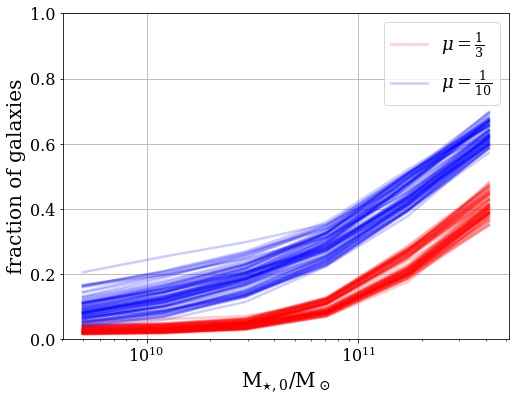

79


In [5]:
with h5py.File(fname,'r') as f:
    key='quench_dat'
    qdat=(f[key]).value
    
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
    
Nruns=qdat.shape[0]
for irun in xrange(Nruns):
    if irun==0:
        ax.plot(10.**qdat[irun][0][0][:-1],qdat[irun][0][1][:-1],'r',
                alpha=0.2,label='$\mu=\\frac{1}{3}$',lw=2.5)
        ax.plot(10.**qdat[irun][1][0][:-1],qdat[irun][1][1][:-1],'b',
                alpha=0.2,label='$\mu=\\frac{1}{10}$',lw=2.5)
    else:
        ax.plot(10.**qdat[irun][0][0][:-1],qdat[irun][0][1][:-1],'r',
                alpha=0.2,lw=2.5)
        ax.plot(10.**qdat[irun][1][0][:-1],qdat[irun][1][1][:-1],'b',
                alpha=0.2,lw=2.5)
#frac_0_3=merg_rates.quench_frac_ft(tpm0,np.log10(1./3.))
#frac_0_10=merg_rates.quench_frac_ft(tpm0,np.log10(1./10.))
#ax.plot(10.**frac_0_3[0],frac_0_3[1],'darkred',lw=2.5)
#ax.plot(10.**frac_0_10[0],frac_0_10[1],'midnightblue',lw=2.5)
ax.set_xlabel('M$_{\star,0}/$M$_\odot$')
ax.set_xscale('log')
ax.set_ylabel('fraction of galaxies')
#ax.set_title('Main prog. galaxies with $N_\mathrm{mergers}'
#             '\\left(\\frac{m_{\star,z}}{M_{\star,z}}\geq\mu\\right)\geq 1$',y=1.1)
#ax.text(0.5,1.04,'all $z$',fontsize=20,transform=ax.transAxes)
ax.set_ylim(0,1)
#ax.set_ylim(1e-2,1)
#ax.set_yscale('log')
ax.legend()

plt.show()

print Nruns

In [6]:
#rms of 1/3 gal fracn
mean=np.mean([qdat[i][0][1] for i in range(qdat.shape[0])],axis=0)
sqdevs=[]
for i in range(qdat.shape[0]):
    sqdevs_add=list((qdat[i][0][1]-mean)**2.)
    sqdevs+=sqdevs_add
sqdevs=np.array(sqdevs)
rms=np.sqrt(np.mean(sqdevs))
print rms
####################

#rms of 1/10 gal fracn
mean=np.mean([qdat[i][1][1] for i in range(qdat.shape[0])],axis=0)
sqdevs=[]
for i in range(qdat.shape[0]):
    sqdevs_add=list((qdat[i][1][1]-mean)**2.)
    sqdevs+=sqdevs_add
sqdevs=np.array(sqdevs)
rms=np.sqrt(np.mean(sqdevs))
print rms
####################

0.07817961814310252
0.07605298627490668


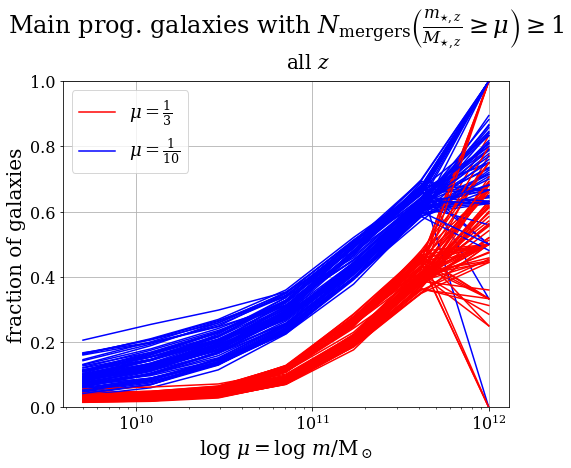

79


In [7]:
with h5py.File(fname,'r') as f:
    key='quench_dat'
    qdat=(f[key]).value
    
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
    
Nruns=qdat.shape[0]
for irun in xrange(Nruns):
    if irun==0:
        ax.plot(10.**qdat[irun][0][0],qdat[irun][0][1],'r',label='$\mu=\\frac{1}{3}$')
        ax.plot(10.**qdat[irun][1][0],qdat[irun][1][1],'b',label='$\mu=\\frac{1}{10}$')
    else:
        ax.plot(10.**qdat[irun][0][0],qdat[irun][0][1],'r')
        ax.plot(10.**qdat[irun][1][0],qdat[irun][1][1],'b')
ax.set_xlabel('log $\mu=\log\ m/$M$_\odot$')
ax.set_xscale('log')
ax.set_ylabel('fraction of galaxies')
ax.set_title('Main prog. galaxies with $N_\mathrm{mergers}'
             '\\left(\\frac{m_{\star,z}}{M_{\star,z}}\geq\mu\\right)\geq 1$',y=1.1)
ax.text(0.5,1.04,'all $z$',fontsize=20,transform=ax.transAxes)
ax.set_ylim(0,1)
ax.legend()
plt.show()

print Nruns

1/3 rms: 0.019593
1/10 rms: 0.075088


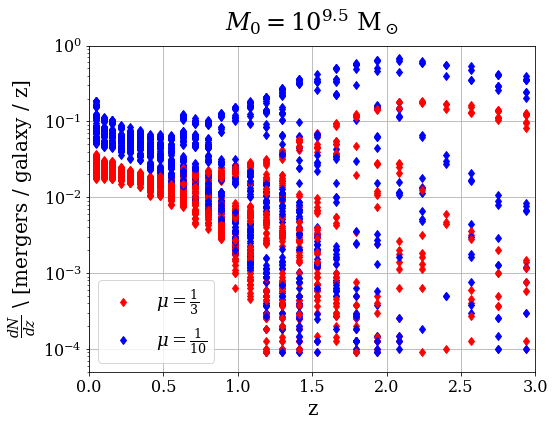

1/3 rms: 0.022185
1/10 rms: 0.114688


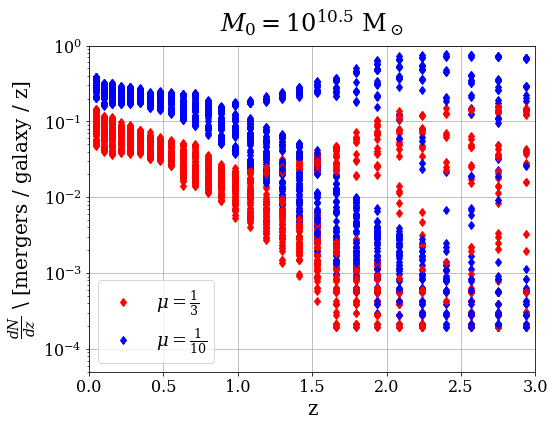

1/3 rms: 0.032204
1/10 rms: 0.097676


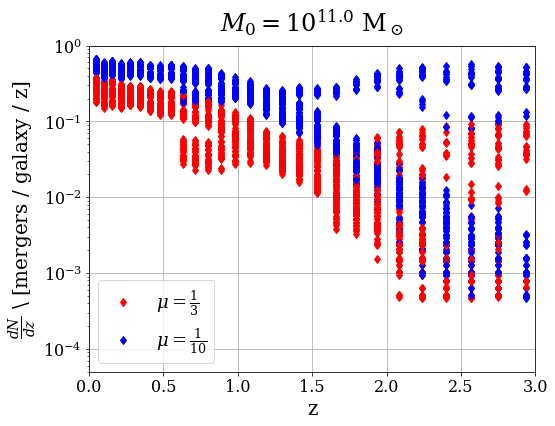

In [8]:
with h5py.File(fname,'r') as f:
    M0s=[9.5,10.5,11.]
    for M0 in M0s:
        #noscat3=merg_rates.dNdx_ofz(tpm0,M0,np.log10(1./3.),'cengal')
        #noscat10=merg_rates.dNdx_ofz(tpm0,M0,np.log10(1./10.),'cengal')
        key='{0:0.1f}dNdz_ofz'.format(M0)
        dat=(f[key]).value
        Nruns=dat.shape[0]

        fig=plt.figure(figsize=(8,6))
        ax=fig.add_subplot(111)
        
        for irun in range(Nruns):
            if irun==0:
                ax.plot(dat[irun][0][0],dat[irun][0][1],'rd',label='$\mu=\\frac{1}{3}$')
                ax.plot(dat[irun][1][0],dat[irun][1][1],'bd',label='$\mu=\\frac{1}{10}$')
            else:
                ax.plot(dat[irun][0][0],dat[irun][0][1],'rd')
                ax.plot(dat[irun][1][0],dat[irun][1][1],'bd')
        
        #rms############
        mean=np.mean([dat[i][0][1] for i in range(dat.shape[0])],axis=0)
        sqdevs=[]
        for i in range(dat.shape[0]):
            sqdevs_add=list((dat[i][0][1]-mean)**2.)
            sqdevs+=sqdevs_add
        sqdevs=np.array(sqdevs)
        rms=np.sqrt(np.mean(sqdevs))
        print'1/3 rms: %f'%rms
        ####################
        
        #rms############
        mean=np.mean([dat[i][1][1] for i in range(dat.shape[0])],axis=0)
        sqdevs=[]
        for i in range(dat.shape[0]):
            sqdevs_add=list((dat[i][1][1]-mean)**2.)
            sqdevs+=sqdevs_add
        sqdevs=np.array(sqdevs)
        rms=np.sqrt(np.mean(sqdevs))
        print'1/10 rms: %f'%rms
        ####################
        
        
        ax.set_yscale('log')
        ax.set_xlim(0,3)
        ax.set_ylim(5e-5,1)
        ax.set_xlabel('z')
        ax.set_ylabel('$\\frac{dN}{dz}$ \ [mergers / galaxy / z]')
        ax.set_title('$M_0=10^{{{0:0.1f}}}$ M$_\odot$'.format(M0))
        ax.legend()
        plt.show()

79
1/3 rms: 0.019593
1/10 rms: 0.075088
79
1/3 rms: 0.022185
1/10 rms: 0.114688
79
1/3 rms: 0.032204
1/10 rms: 0.097676


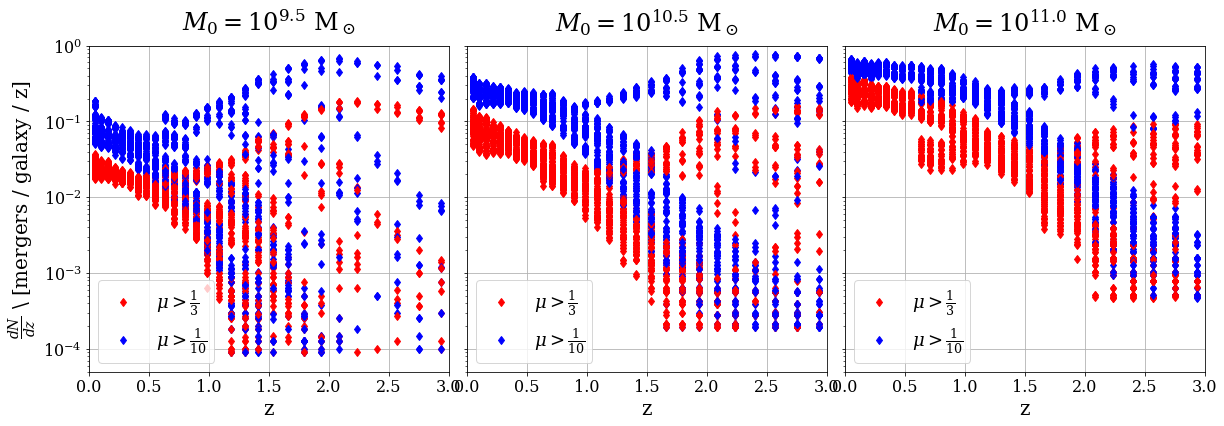

In [9]:
fig=plt.figure(figsize=(20,6))

with h5py.File(fname,'r') as f:
    M0s=[9.5,10.5,11.]
    for i,M0 in enumerate(M0s):
        #noscat3=merg_rates.dNdx_ofz(tpm0,M0,np.log10(1./3.),'cengal')
        #noscat10=merg_rates.dNdx_ofz(tpm0,M0,np.log10(1./10.),'cengal')
        key='{0:0.1f}dNdz_ofz'.format(M0)
        dat=(f[key]).value
        Nruns=dat.shape[0]
        print Nruns
        
        ax=fig.add_subplot(1,3,i+1)
        
        for irun in range(Nruns):
            if irun==0:
                ax.plot(dat[irun][0][0],dat[irun][0][1],'rd',label='$\mu>\\frac{1}{3}$')
                ax.plot(dat[irun][1][0],dat[irun][1][1],'bd',label='$\mu>\\frac{1}{10}$')
            else:
                ax.plot(dat[irun][0][0],dat[irun][0][1],'rd')
                ax.plot(dat[irun][1][0],dat[irun][1][1],'bd')
        if i==0:
            ax.set_ylabel('$\\frac{dN}{dz}$ \ [mergers / galaxy / z]')
        else:
            plt.setp(ax.get_yticklabels(), visible=False)
        #rms############
        mean=np.mean([dat[i][0][1] for i in range(dat.shape[0])],axis=0)
        sqdevs=[]
        for i in range(dat.shape[0]):
            sqdevs_add=list((dat[i][0][1]-mean)**2.)
            sqdevs+=sqdevs_add
        sqdevs=np.array(sqdevs)
        rms=np.sqrt(np.mean(sqdevs))
        print'1/3 rms: %f'%rms
        ####################
        
        #rms############
        mean=np.mean([dat[i][1][1] for i in range(dat.shape[0])],axis=0)
        sqdevs=[]
        for i in range(dat.shape[0]):
            sqdevs_add=list((dat[i][1][1]-mean)**2.)
            sqdevs+=sqdevs_add
        sqdevs=np.array(sqdevs)
        rms=np.sqrt(np.mean(sqdevs))
        print'1/10 rms: %f'%rms
        ####################
        if i in [1,2]:
            plt.setp(ax.get_yticklabels(), visible=False)
        fig.subplots_adjust(wspace=0.05) #bring plots close together
        
        ax.set_yscale('log')
        ax.set_xlim(0,3)
        ax.set_ylim(5e-5,1)
        ax.set_xlabel('z')
        
        ax.set_title('$M_0=10^{{{0:0.1f}}}$ M$_\odot$'.format(M0))
        #if i in [1,2]:
        ax.legend()

plt.show()

55
1/3 rms: 0.029084
1/10 rms: 0.073807
55
1/3 rms: 0.041698
1/10 rms: 0.112870
55
1/3 rms: 0.040878
1/10 rms: 0.109959


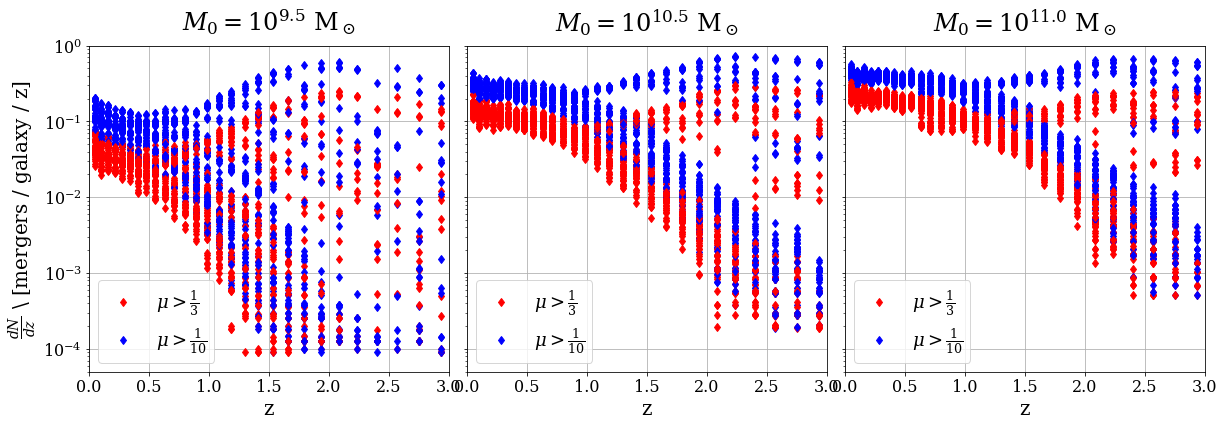

In [10]:
fig=plt.figure(figsize=(20,6))

with h5py.File(fname4,'r') as f:
    M0s=[9.5,10.5,11.]
    for i,M0 in enumerate(M0s):
        #noscat3=merg_rates.dNdx_ofz(tpm0,M0,np.log10(1./3.),'cengal')
        #noscat10=merg_rates.dNdx_ofz(tpm0,M0,np.log10(1./10.),'cengal')
        key='{0:0.1f}dNdz_ofz'.format(M0)
        dat=(f[key]).value
        Nruns=dat.shape[0]
        print Nruns
        
        ax=fig.add_subplot(1,3,i+1)
        
        for irun in range(Nruns):
            if irun==0:
                ax.plot(dat[irun][0][0],dat[irun][0][1],'rd',label='$\mu>\\frac{1}{3}$')
                ax.plot(dat[irun][1][0],dat[irun][1][1],'bd',label='$\mu>\\frac{1}{10}$')
            else:
                ax.plot(dat[irun][0][0],dat[irun][0][1],'rd')
                ax.plot(dat[irun][1][0],dat[irun][1][1],'bd')
        if i==0:
            ax.set_ylabel('$\\frac{dN}{dz}$ \ [mergers / galaxy / z]')
        else:
            plt.setp(ax.get_yticklabels(), visible=False)
        #rms############
        mean=np.mean([dat[i][0][1] for i in range(dat.shape[0])],axis=0)
        sqdevs=[]
        for i in range(dat.shape[0]):
            sqdevs_add=list((dat[i][0][1]-mean)**2.)
            sqdevs+=sqdevs_add
        sqdevs=np.array(sqdevs)
        rms=np.sqrt(np.mean(sqdevs))
        print'1/3 rms: %f'%rms
        ####################
        
        #rms############
        mean=np.mean([dat[i][1][1] for i in range(dat.shape[0])],axis=0)
        sqdevs=[]
        for i in range(dat.shape[0]):
            sqdevs_add=list((dat[i][1][1]-mean)**2.)
            sqdevs+=sqdevs_add
        sqdevs=np.array(sqdevs)
        rms=np.sqrt(np.mean(sqdevs))
        print'1/10 rms: %f'%rms
        ####################
        if i in [1,2]:
            plt.setp(ax.get_yticklabels(), visible=False)
        fig.subplots_adjust(wspace=0.05) #bring plots close together
        
        ax.set_yscale('log')
        ax.set_xlim(0,3)
        ax.set_ylim(5e-5,1)
        ax.set_xlabel('z')
        
        ax.set_title('$M_0=10^{{{0:0.1f}}}$ M$_\odot$'.format(M0))
        #if i in [1,2]:
        ax.legend()

plt.show()

0.2 rms: 0.153954


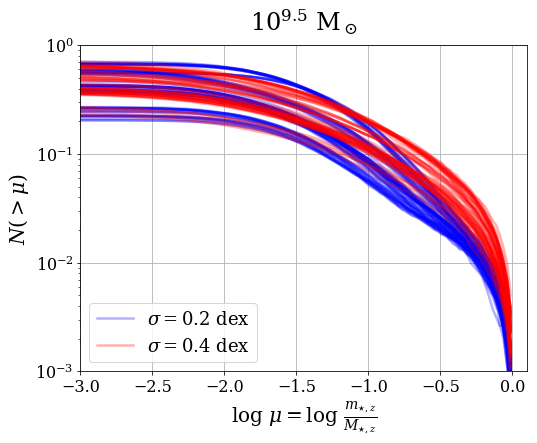

0.4 rms: 0.127105
0.2 rms: 0.058559


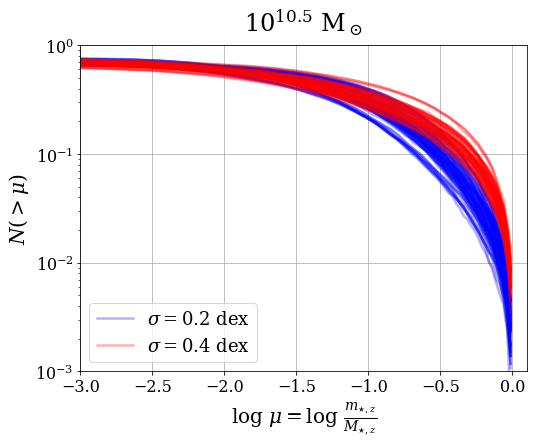

0.4 rms: 0.041768
0.2 rms: 0.044809


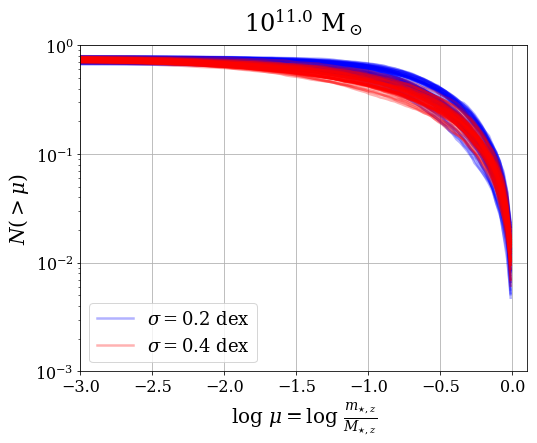

0.4 rms: 0.032923


In [11]:
with h5py.File(fname,'r') as f:
    def Nplot(M0,col1,col2):
        fig=plt.figure(figsize=(8,6))
        ax=fig.add_subplot(111)
        key='{0:0.1f}dNdz_ofmu'.format(M0)
        dat=(f[key]).value
        Nruns=dat.shape[0]
        for irun in range(Nruns):
            if irun==1:
                ax.plot(dat[irun][0],dat[irun][1],col1,alpha=0.3,lw=2.5,
                    label='$\sigma=0.2$ dex')
            else:
                ax.plot(dat[irun][0],dat[irun][1],col1,alpha=0.3,lw=2.5)
        ax.set_yscale('log')
        ax.set_xlim(-3,0.1)
        ax.set_ylim(1e-3,1)
        ax.set_title('$10^{{{0:0.1f}}}$ M$_\odot$'.format(M0))
        ax.set_ylabel('$N(>\mu)$')
        ax.set_xlabel('log $\mu= $log '
                      '$\\frac{m_{\star,z}}{M_{\star,z}}$')
        
        #RMS
        logdat=[np.log10(dat[i][1]) for i in range(Nruns)]
        #print logdat
        mean=np.mean(logdat,axis=0)
        sqrdevs=[]
        for i in range(Nruns):
            sqrdevs_add=list((logdat[i]-mean)**2.)
            sqrdevs+=sqrdevs_add
        rms=np.sqrt(np.mean(sqrdevs))
        print'0.2 rms: %f'%rms
        
        with h5py.File(fname4,'r') as f4:
            dat=(f4[key]).value
            Nruns=dat.shape[0]
            for irun in range(Nruns):
                if irun==1:
                    ax.plot(dat[irun][0],dat[irun][1],col2,alpha=0.3,lw=2.5,
                            label='$\sigma=0.4$ dex')
                else:
                    ax.plot(dat[irun][0],dat[irun][1],col2,alpha=0.3,lw=2.5)
        ax.legend()    
        plt.show()
        
        #RMS
        logdat=[np.log10(dat[i][1]) for i in range(Nruns)]
        #print logdat
        mean=np.mean(logdat,axis=0)
        sqrdevs=[]
        for i in range(Nruns):
            sqrdevs_add=list((logdat[i]-mean)**2.)
            sqrdevs+=sqrdevs_add
        rms=np.sqrt(np.mean(sqrdevs))
        print'0.4 rms: %f'%rms
        
    Nplot(9.5,'b','r')
    Nplot(10.5,'b','r')
    Nplot(11.,'b','r')

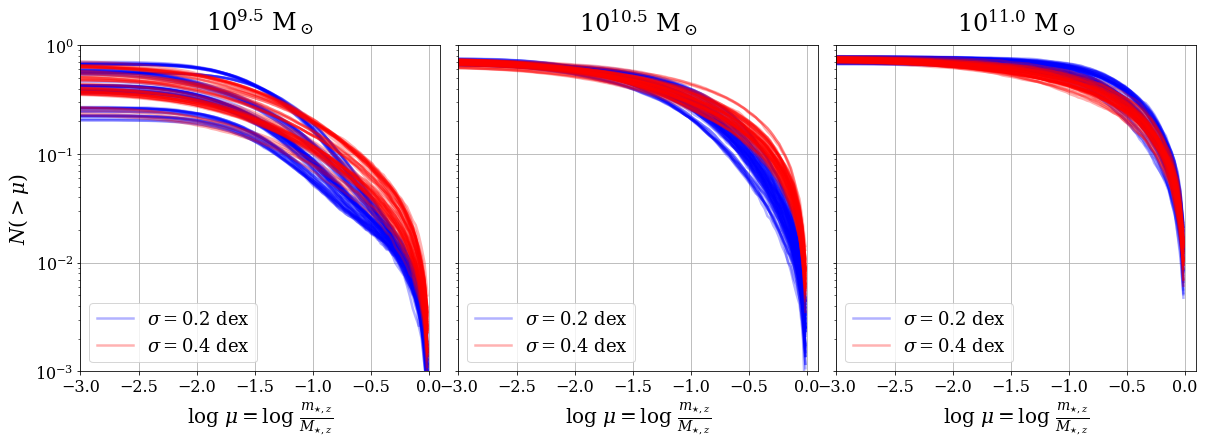

In [12]:
fig=plt.figure(figsize=(20,6))

with h5py.File(fname,'r') as f:
    def Nplot_panel(i,M0,col1,col2):

        ax=fig.add_subplot(1,3,i)
        key='{0:0.1f}dNdz_ofmu'.format(M0)
        dat=(f[key]).value
        Nruns=dat.shape[0]
        for irun in range(Nruns):
            if irun==1:
                ax.plot(dat[irun][0],dat[irun][1],col1,alpha=0.3,lw=2.5,
                    label='$\sigma=0.2$ dex')
            else:
                ax.plot(dat[irun][0],dat[irun][1],col1,alpha=0.3,lw=2.5)
        ax.set_yscale('log')
        ax.set_xlim(-3,0.1)
        ax.set_ylim(1e-3,1)
        ax.set_title('$10^{{{0:0.1f}}}$ M$_\odot$'.format(M0))
        ax.set_xlabel('log $\mu= $log '
                      '$\\frac{m_{\star,z}}{M_{\star,z}}$')
               
        with h5py.File(fname4,'r') as f4:
            dat=(f4[key]).value
            Nruns=dat.shape[0]
            for irun in range(Nruns):
                if irun==1:
                    ax.plot(dat[irun][0],dat[irun][1],col2,alpha=0.3,lw=2.5,
                            label='$\sigma=0.4$ dex')
                else:
                    ax.plot(dat[irun][0],dat[irun][1],col2,alpha=0.3,lw=2.5)
        ax.legend()
        
        fig.subplots_adjust(wspace=0.05) #bring plots close together
        if i==1:
            ax.set_ylabel('$N(>\mu)$')
        if i in [2,3]:
            plt.setp(ax.get_yticklabels(), visible=False)
        
    Nplot_panel(1,9.5,'b','r')
    Nplot_panel(2,10.5,'b','r')
    Nplot_panel(3,11.,'b','r')
plt.show()

In [13]:
with h5py.File(fname,'r') as f:
    print f.keys()

[u'10.5dNdz_ofmu', u'10.5dNdz_ofz', u'11.0dNdz_ofmu', u'11.0dNdz_ofz', u'9.5dNdz_ofmu', u'9.5dNdz_ofz', u'Ns105', u'Ns11', u'Ns95', u'Ps_10.5M_-0.5-0.0', u'Ps_10.5M_-1.0--0.5', u'Ps_10.5M_-5.0--1.0', u'Ps_11.0M_-0.5-0.0', u'Ps_11.0M_-1.0--0.5', u'Ps_11.0M_-5.0--1.0', u'Ps_9.5M_-0.5-0.0', u'Ps_9.5M_-1.0--0.5', u'Ps_9.5M_-5.0--1.0', u'quench_dat']


In [14]:
def mak_all_panels_new(fname,legloc=0,
                       jigger=False,label=None,col='b',limit=False):
    Mconds=[9.5,10.5,11.]
    rngs=[[-5.,-1.],[-1.,-0.5],[-0.5,0]]
    NMconds=len(Mconds)
    Nrngs=len(rngs)
    w=13
    h=3.*NMconds
    fig,axs=plt.subplots(NMconds,Nrngs,figsize=(w,h),sharex=True,
                         sharey='row')
    fig.subplots_adjust(wspace=0.,hspace=0.)
    try:
        axs=axs.ravel()
    except AttributeError:
        pass
    axc=0
    axr=0
    axi=-1
    for Mcond in Mconds:
        axr+=1
        for rng in rngs:
            axc+=1
            axi+=1
            lo=rng[0]
            hi=rng[1]
            
            #Make the histogram for the data with scatter
            key='Ps_{0:0.1f}M_{1:0.1f}-{2:0.1f}'.format(Mcond,rng[0],rng[1])
            with h5py.File(fname,'r') as f:
                dat=(f[key]).value
            Nruns=dat.shape[0]
            for i in range(Nruns):
                #with h5py.File(fname4,'r') as f4:
                #    dat4=(f4[key]).value
                ############################                    
                if i==0:
                    if limit:
                        axs[axi].step(dat[i][0],dat[i][1],
                                  where='mid',color=col,lw=2.5,
                                  label=label)
                    else:
                        print dat[i][0]
                        axs[axi].step(dat[i][0],dat[i][1],
                                      where='mid',color=col,lw=2.5,
                                      label=label,alpha=0.3)
                else:
                    if limit:
                        continue
                    else:
                        axs[axi].step(dat[i][0],dat[i][1],
                                  where='mid',color=col,lw=2.5,
                                  alpha=0.3)
                #axs[axi].step(dat4[0][0],dat4[0][1],
                #   where='mid',color='r',lw=2.5)
            noscat=merg_rates.hgram_dat_ft(tpm0,rng,Mcond,1,34)
            axs[axi].bar(noscat[0],noscat[1],align='center',width=1.,
                         color='turquoise',label='no scatter')
            ############################
            axs[axi].set_yscale('log')
            if axr==1:
                if axc==1:
                    axs[axi].set_title('Micro mergers')
                elif axc==2:
                    axs[axi].set_title('Minor mergers')
                elif axc==3:
                    axs[axi].set_title('Major mergers')
                else:
                    raise ValueError('Title error')
            elif axc==2:
                    axs[axi].set_xlabel('Merger count')
            if axc==Nrngs:
                
                if axr==1:
                    axs[axi].legend(fontsize=15,loc=legloc,framealpha=0.9)
                ylim=axs[axi].get_ylim()
                logylo=np.log10(ylim[0])
                logyhi=np.log10(ylim[1])
                midy=10**((logylo+logyhi)/2.)          
    for i in range(9):
        axs[i].set_xticks(np.arange(dat[0][0].max()+2))
    for i in [0,3,6]:
        axs[i].set_ylabel('$P(\geq$count)',fontsize=18)
    for i in [6,7,8]:
        axs[i].set_xlabel('count')
    axs[0].text(-5,midy,'$M_{{\star 0}}=10^{{{0:0.1f}}}$' \
                         ' M$_\odot$'.format(9.5),
                         fontsize=17,rotation='vertical',
                         verticalalignment='center')   
    axs[3].text(-5,midy,'$M_{{\star 0}}=10^{{{0:0.1f}}}$' \
                     ' M$_\odot$'.format(10.5),
                     fontsize=17,rotation='vertical',
                     verticalalignment='center')  
    axs[6].text(-5,midy,'$M_{{\star 0}}=10^{{{0:0.1f}}}$' \
                     ' M$_\odot$'.format(11.),
                     fontsize=17,rotation='vertical',
                     verticalalignment='center')  
    #axs[8].legend(loc='upper right')
    plt.show()
    return

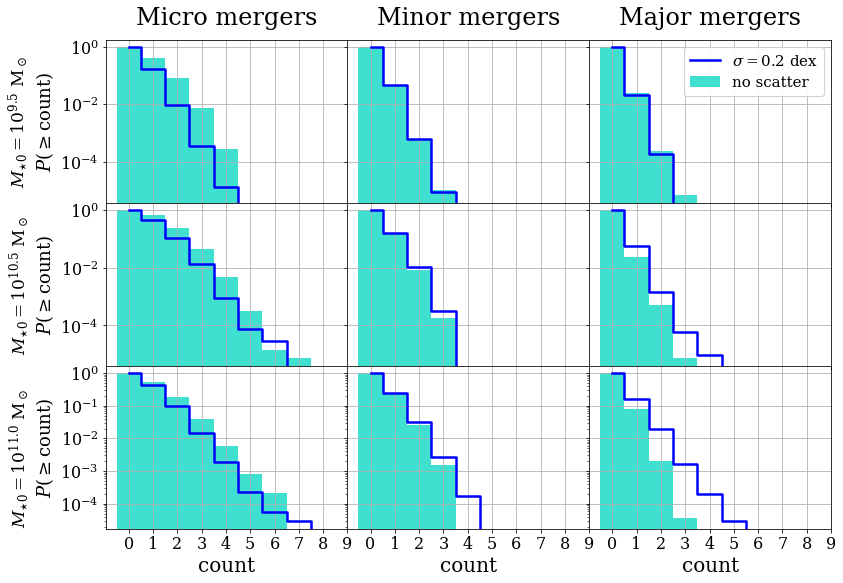

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [15]:
mak_all_panels_new(fname,label='$\sigma=0.2$ dex',col='b',limit=True)

[0. 1. 2. 3. 4. 5. 6. 7. 8.]
[0. 1. 2. 3. 4. 5. 6. 7. 8.]
[0. 1. 2. 3. 4. 5. 6. 7. 8.]
[0. 1. 2. 3. 4. 5. 6. 7. 8.]
[0. 1. 2. 3. 4. 5. 6. 7. 8.]
[0. 1. 2. 3. 4. 5. 6. 7. 8.]
[0. 1. 2. 3. 4. 5. 6. 7. 8.]
[0. 1. 2. 3. 4. 5. 6. 7. 8.]
[0. 1. 2. 3. 4. 5. 6. 7. 8.]


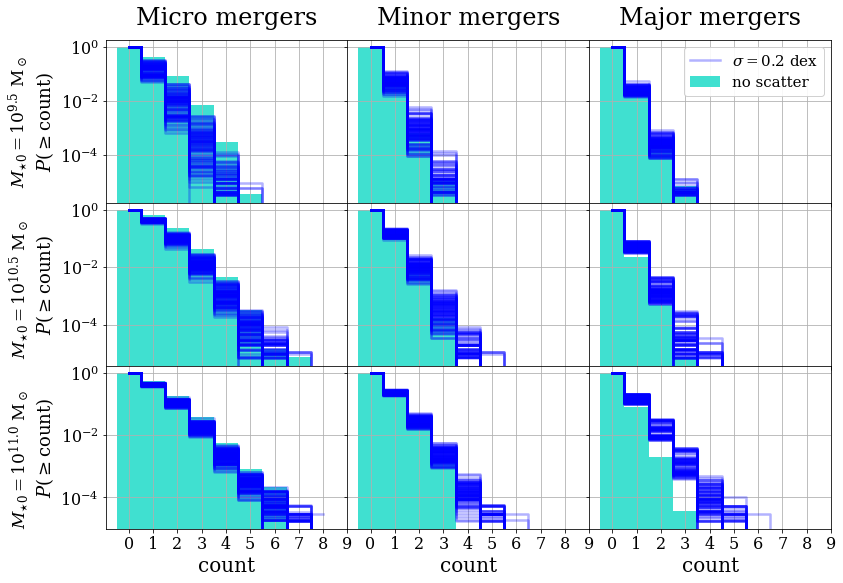

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [16]:
mak_all_panels_new(fname,label='$\sigma=0.2$ dex',col='b')

[0. 1. 2. 3. 4. 5. 6. 7. 8.]
[0. 1. 2. 3. 4. 5. 6. 7. 8.]
[0. 1. 2. 3. 4. 5. 6. 7. 8.]
[0. 1. 2. 3. 4. 5. 6. 7. 8.]
[0. 1. 2. 3. 4. 5. 6. 7. 8.]
[0. 1. 2. 3. 4. 5. 6. 7. 8.]
[0. 1. 2. 3. 4. 5. 6. 7. 8.]
[0. 1. 2. 3. 4. 5. 6. 7. 8.]
[0. 1. 2. 3. 4. 5. 6. 7. 8.]


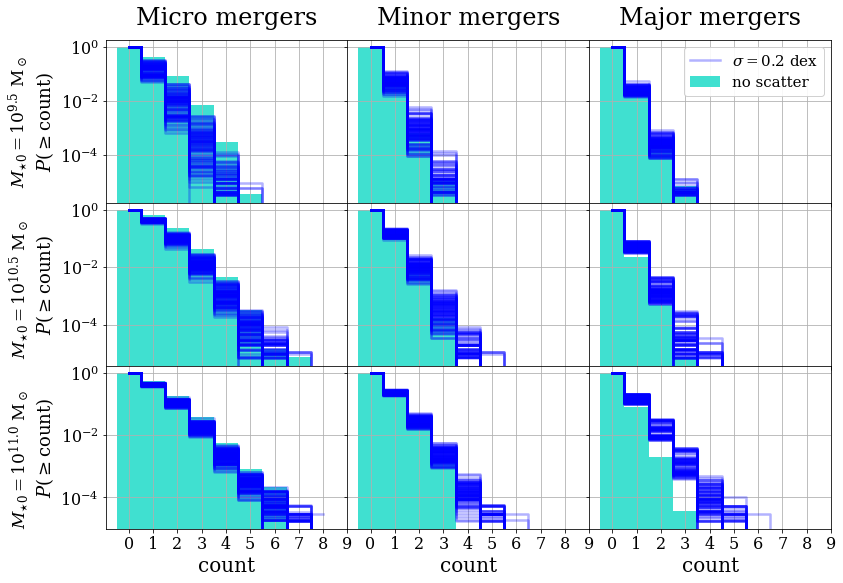

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [17]:
mak_all_panels_new(fname,label='$\sigma=0.2$ dex',col='b')

[0. 1. 2. 3. 4. 5. 6. 7. 8.]
[0. 1. 2. 3. 4. 5. 6. 7. 8.]
[0. 1. 2. 3. 4. 5. 6. 7. 8.]
[0. 1. 2. 3. 4. 5. 6. 7. 8.]
[0. 1. 2. 3. 4. 5. 6. 7. 8.]
[0. 1. 2. 3. 4. 5. 6. 7. 8.]
[0. 1. 2. 3. 4. 5. 6. 7. 8.]
[0. 1. 2. 3. 4. 5. 6. 7. 8.]
[0. 1. 2. 3. 4. 5. 6. 7. 8.]


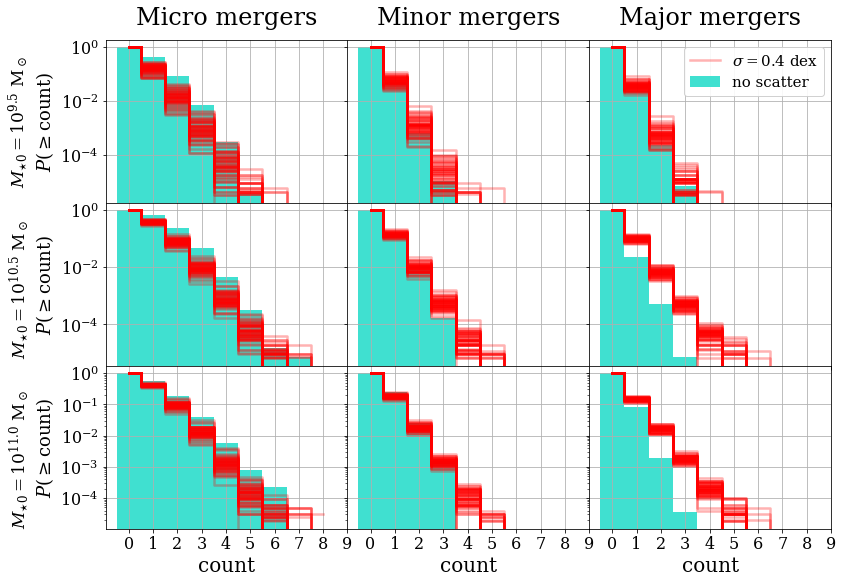

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [18]:
mak_all_panels_new(fname4,label='$\sigma=0.4$ dex',col='r')

In [19]:
Mconds=[9.5,10.5,11.]
rngs=[[-5.,-1.],[-1.,-0.5],[-0.5,0]]
NMconds=len(Mconds)
Nrngs=len(rngs)
stds=[]

for Mcond in Mconds:
    for rng in rngs:
        stds_add=[]
        key='Ps_{0:0.1f}M_{1:0.1f}-{2:0.1f}'.format(Mcond,rng[0],rng[1])
        with h5py.File(fname,'r') as f:
            dat=(f[key]).value
            Nruns=dat.shape[0]
            for c in range(9):
                stds_add+=[np.std([dat[i][1][c] for i in range(Nruns)])]
    print stds_add
    #stds+=stds_add
print stds  

[7.788312353081534e-13, 0.007463934422826468, 0.00015808434076800457, 2.878603459997201e-06, 0.0, 0.0, 0.0, 0.0, 0.0]
[7.332780915037444e-13, 0.013904221510448775, 0.0010901011150181092, 7.593535091100218e-05, 5.560439895009052e-06, 0.0, 0.0, 0.0, 0.0]
[6.662760644078547e-13, 0.03350611243338126, 0.007468174090228227, 0.0009911852999626525, 9.895560861609916e-05, 1.817981866804884e-05, 2.8713502984189845e-06, 0.0, 0.0]
[]


In [20]:
allstds=[]
Mconds=[9.5,10.5,11.]
rngs=[[-5.,-1.],[-1.,-0.5],[-0.5,0]]

for Mcond in Mconds:
    for rng in rngs:
        key='Ps_{0:0.1f}M_{1:0.1f}-{2:0.1f}'.format(Mcond,rng[0],rng[1])
        with h5py.File(fname,'r') as f:
            dat=np.log10((f[key]).value)
            Nruns=dat.shape[0]
            stdevs=[np.std([dat[i][1][c] for i in range(Nruns)]) for c in range(9)]
        allstds.append(stdevs)


/home/users/staudt/envs/mergerspython2env/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/home/users/staudt/envs/mergerspython2env/lib/python2.7/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [21]:
def mak_std_panels_dex(fname,legloc=0):
    Mconds=[9.5,10.5,11.]
    rngs=[[-5.,-1.],[-1.,-0.5],[-0.5,0]]
    NMconds=len(Mconds)
    Nrngs=len(rngs)
    w=13
    h=4.*NMconds
    fig,axs=plt.subplots(NMconds,Nrngs,figsize=(w,h),sharex=True,sharey='row')
    fig.subplots_adjust(wspace=0.,hspace=0.)
    try:
        axs=axs.ravel()
    except AttributeError:
        pass
    axc=0
    axr=0
    axi=-1
    for Mcond in Mconds:
        axr+=1
        for rng in rngs:
            axc+=1
            axi+=1
            
            axs[axi].bar(range(9),allstds[axi])
            
            ############################
            #axs[axi].set_yscale('log')
            if axr==1:
                if axc==1:
                    axs[axi].set_title('Micro mergers')
                elif axc==2:
                    axs[axi].set_title('Minor mergers')
                elif axc==3:
                    axs[axi].set_title('Major mergers')
                else:
                    raise ValueError('Title error')
            elif axc==2:
                    axs[axi].set_xlabel('Merger count')
            if axc==Nrngs:
                
                if axr==1:
                    axs[axi].legend(fontsize=15,loc=legloc,framealpha=0.9)
                ylim=axs[axi].get_ylim()
                logylo=np.log10(ylim[0])
                logyhi=np.log10(ylim[1])          

    for i in [0,3,6]:
        axs[i].set_ylabel('st dev / [dex]',fontsize=18)
    axs[0].text(-5,0.2,'$M_{{\star 0}}=10^{{{0:0.1f}}}$' \
                         ' M$_\odot$'.format(9.5),
                         fontsize=20,rotation='vertical',
                         verticalalignment='center')   
    axs[3].text(-5,0.2,'$M_{{\star 0}}=10^{{{0:0.1f}}}$' \
                     ' M$_\odot$'.format(10.5),
                     fontsize=20,rotation='vertical',
                     verticalalignment='center')  
    axs[6].text(-5,0.17,'$M_{{\star 0}}=10^{{{0:0.1f}}}$' \
                     ' M$_\odot$'.format(11.),
                     fontsize=20,rotation='vertical',
                     verticalalignment='center')  
    
    for i in range(9):
        axs[i].set_xticks(np.arange(dat[0][0].max()+7))
    #for i in range(9):
    #    axs[i].set_ylim(1e-7,1e-1)
    
    plt.show()
    return

In [22]:
def mak_std_panels(fname,legloc=0,ylimp=None):
    Mconds=[9.5,10.5,11.]
    rngs=[[-5.,-1.],[-1.,-0.5],[-0.5,0]]
    NMconds=len(Mconds)
    Nrngs=len(rngs)
    w=13
    h=3.*NMconds
    fig,axs=plt.subplots(NMconds,Nrngs,figsize=(w,h),sharex=True,sharey='row')
    fig.subplots_adjust(wspace=0.,hspace=0.)
    try:
        axs=axs.ravel()
    except AttributeError:
        pass
    axc=0
    axr=0
    axi=-1
    for Mcond in Mconds:
        axr+=1
        for rng in rngs:
            axc+=1
            axi+=1
            
            axs[axi].bar(range(9),allstds[axi])
            
            ############################
            #axs[axi].set_yscale('log')
            if axr==1:
                if axc==1:
                    axs[axi].set_title('Micro mergers')
                elif axc==2:
                    axs[axi].set_title('Minor mergers')
                elif axc==3:
                    axs[axi].set_title('Major mergers')
                else:
                    raise ValueError('Title error')
            elif axc==2:
                    axs[axi].set_xlabel('Merger count')
            if axc==Nrngs:
                
                if axr==1:
                    axs[axi].legend(fontsize=15,loc=legloc,framealpha=0.9)
                ylim=axs[axi].get_ylim()
                logylo=np.log10(ylim[0])
                logyhi=np.log10(ylim[1])          

    for i in [0,3,6]:
        axs[i].set_ylabel('st dev',fontsize=18)
    axs[0].text(-5,1e-4,'$M_{{\star 0}}=10^{{{0:0.1f}}}$' \
                         ' M$_\odot$'.format(9.5),
                         fontsize=17,rotation='vertical',
                         verticalalignment='center')   
    axs[3].text(-5,1e-4,'$M_{{\star 0}}=10^{{{0:0.1f}}}$' \
                     ' M$_\odot$'.format(10.5),
                     fontsize=17,rotation='vertical',
                     verticalalignment='center')  
    axs[6].text(-5,1e-4,'$M_{{\star 0}}=10^{{{0:0.1f}}}$' \
                     ' M$_\odot$'.format(11.),
                     fontsize=17,rotation='vertical',
                     verticalalignment='center')  
    for i in range(9):
        axs[i].set_xticks(np.arange(dat[0][0].max()+2))
        axs[i].set_yscale('log')
        if not ylimp is None:
            print ylimp
            axs[i].set_ylim(ylimp[0],ylimp[1])
        else:
            print'no ylim'
            axs[i].set_ylim(1e-7,1e-1)
    for i in [6,7,8]:
        axs[i].set_xlabel('count')
    
    plt.show()
    return

In [23]:
def mak_std_panels_rel(fname,legloc=0,ylimp=None,col='b'):
    Mconds=[9.5,10.5,11.]
    rngs=[[-5.,-1.],[-1.,-0.5],[-0.5,0]]
    NMconds=len(Mconds)
    Nrngs=len(rngs)
    w=13
    h=3.*NMconds
    fig,axs=plt.subplots(NMconds,Nrngs,figsize=(w,h),sharex=True,sharey='row')
    fig.subplots_adjust(wspace=0.,hspace=0.)
    try:
        axs=axs.ravel()
    except AttributeError:
        pass
    axc=0
    axr=0
    axi=-1
    for Mcond in Mconds:
        axr+=1
        for rng in rngs:
            axc+=1
            axi+=1
            
            axs[axi].bar(range(9),allstds[axi],color=col)
            
            ############################
            #axs[axi].set_yscale('log')
            if axr==1:
                if axc==1:
                    axs[axi].set_title('Micro mergers')
                elif axc==2:
                    axs[axi].set_title('Minor mergers')
                elif axc==3:
                    axs[axi].set_title('Major mergers')
                else:
                    raise ValueError('Title error')
            elif axc==2:
                    axs[axi].set_xlabel('Merger count')
            if axc==Nrngs:
                
                if axr==1:
                    axs[axi].legend(fontsize=15,loc=legloc,framealpha=0.9)
                ylim=axs[axi].get_ylim()
                logylo=np.log10(ylim[0])
                logyhi=np.log10(ylim[1])          

    for i in [0,3,6]:
        axs[i].set_ylabel('st dev / mean',fontsize=18)
    axs[0].text(-5,1,'$M_{{\star 0}}=10^{{{0:0.1f}}}$' \
                         ' M$_\odot$'.format(9.5),
                         fontsize=17,rotation='vertical',
                         verticalalignment='center')   
    axs[3].text(-5,1,'$M_{{\star 0}}=10^{{{0:0.1f}}}$' \
                     ' M$_\odot$'.format(10.5),
                     fontsize=17,rotation='vertical',
                     verticalalignment='center')  
    axs[6].text(-5,1,'$M_{{\star 0}}=10^{{{0:0.1f}}}$' \
                     ' M$_\odot$'.format(11.),
                     fontsize=17,rotation='vertical',
                     verticalalignment='center')  
    for i in range(9):
        axs[i].set_xticks(np.arange(dat[0][0].max()+2))
        axs[i].set_yscale('log')
        if not ylimp is None:
            print ylimp
            axs[i].set_ylim(ylimp[0],ylimp[1])
        else:
            print'no ylim'
            axs[i].set_ylim(1e-7,1e-1)
    
    plt.show()
    return

In [24]:
def mak_std_panels_rel2(allstds1,allstds2,legloc=0,ylimp=None,
                        xl_loc=1.):
    Mconds=[9.5,10.5,11.]
    rngs=[[-5.,-1.],[-1.,-0.5],[-0.5,0]]
    NMconds=len(Mconds)
    Nrngs=len(rngs)
    w=13
    h=3.*NMconds
    fig,axs=plt.subplots(NMconds,Nrngs,figsize=(w,h),sharex=True,sharey='row')
    fig.subplots_adjust(wspace=0.,hspace=0.)
    try:
        axs=axs.ravel()
    except AttributeError:
        pass
    axc=0
    axr=0
    axi=-1
    for Mcond in Mconds:
        axr+=1
        for rng in rngs:
            axc+=1
            axi+=1
            
            axs[axi].bar(range(9),allstds1[axi],color='b',width=0.4,
                         align='edge',label='$\sigma=0.2$ dex')
            axs[axi].bar(range(9),allstds2[axi],color='r',width=-0.4,
                         align='edge',label='$\sigma=0.4$ dex')
            
            ############################
            #axs[axi].set_yscale('log')
            if axr==1:
                if axc==1:
                    axs[axi].set_title('Micro mergers')
                elif axc==2:
                    axs[axi].set_title('Minor mergers')
                elif axc==3:
                    axs[axi].set_title('Major mergers')
                else:
                    raise ValueError('Title error')
            elif axc==2:
                    axs[axi].set_xlabel('Merger count')
            if axc==Nrngs:
                
                if axr==1:
                    axs[axi].legend(fontsize=15,
                                    bbox_to_anchor=(xl_loc,0.95),
                                    framealpha=0.9)
                ylim=axs[axi].get_ylim()
                logylo=np.log10(ylim[0])
                logyhi=np.log10(ylim[1])          

    for i in [0,3,6]:
        axs[i].set_ylabel('st dev / mean',fontsize=18)
    axs[0].text(-5,1,'$M_{{\star 0}}=10^{{{0:0.1f}}}$' \
                         ' M$_\odot$'.format(9.5),
                         fontsize=17,rotation='vertical',
                         verticalalignment='center')   
    axs[3].text(-5,1,'$M_{{\star 0}}=10^{{{0:0.1f}}}$' \
                     ' M$_\odot$'.format(10.5),
                     fontsize=17,rotation='vertical',
                     verticalalignment='center')  
    axs[6].text(-5,1,'$M_{{\star 0}}=10^{{{0:0.1f}}}$' \
                     ' M$_\odot$'.format(11.),
                     fontsize=17,rotation='vertical',
                     verticalalignment='center')  
    for i in range(9):
        axs[i].set_xticks(np.arange(dat[0][0].max()+2))
        axs[i].set_yscale('log')
        if not ylimp is None:
            axs[i].set_ylim(ylimp[0],ylimp[1])
        else:
            axs[i].set_ylim(1e-7,1e-1)
    
    for i in [6,7,8]:
        axs[i].set_xlabel('count')
    
    plt.show()
    return

/home/users/staudt/envs/mergerspython2env/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/home/users/staudt/envs/mergerspython2env/lib/python2.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log10


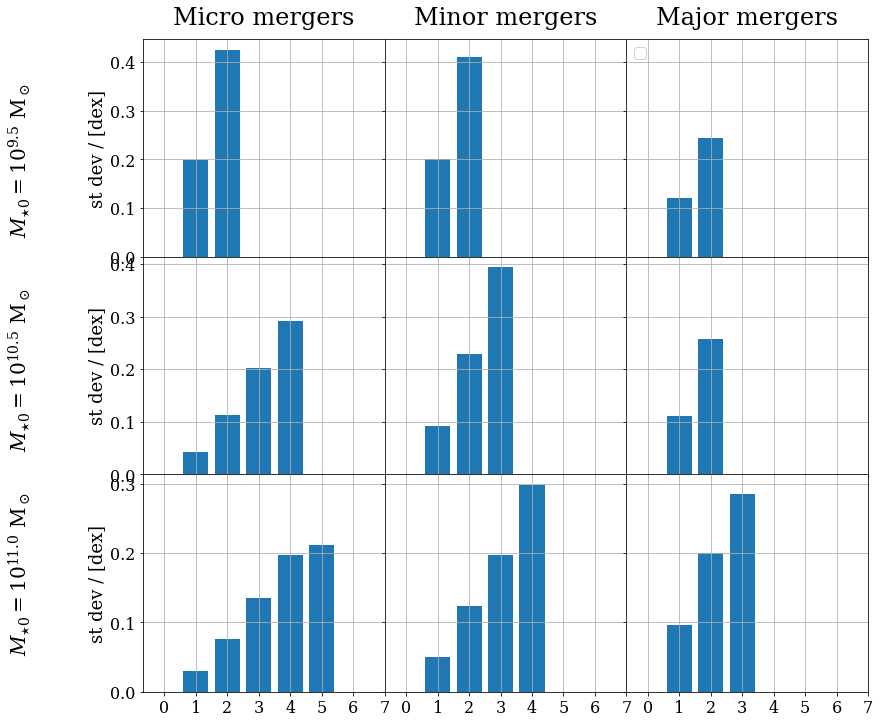

In [25]:
allstds=[]
Mconds=[9.5,10.5,11.]
rngs=[[-5.,-1.],[-1.,-0.5],[-0.5,0]]

for Mcond in Mconds:
    for rng in rngs:
        key='Ps_{0:0.1f}M_{1:0.1f}-{2:0.1f}'.format(Mcond,rng[0],rng[1])
        with h5py.File(fname,'r') as f:
            dat=np.log10((f[key]).value)
            Nruns=dat.shape[0]
            stdevs=[np.std([dat[i][1][c] for i in range(Nruns)]) 
                    for c in range(9)]
        allstds.append(stdevs)

mak_std_panels_dex(fname)

/home/users/staudt/envs/mergerspython2env/lib/python2.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log10


no ylim
no ylim
no ylim
no ylim
no ylim
no ylim
no ylim
no ylim
no ylim


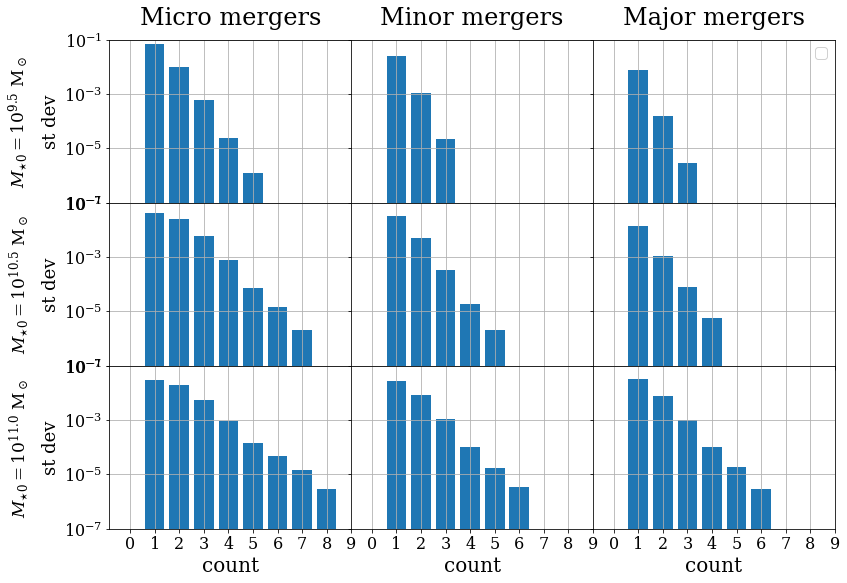

In [26]:
allstds=[]
Mconds=[9.5,10.5,11.]
rngs=[[-5.,-1.],[-1.,-0.5],[-0.5,0]]

for Mcond in Mconds:
    for rng in rngs:
        key='Ps_{0:0.1f}M_{1:0.1f}-{2:0.1f}'.format(Mcond,rng[0],rng[1])
        with h5py.File(fname,'r') as f:
            dat=(f[key]).value
            Nruns=dat.shape[0]
            stdevs=[np.std([dat[i][1][c] for i in range(Nruns)]) for c in range(9)]
        allstds.append(stdevs)
        
mak_std_panels(fname)

/home/users/staudt/envs/mergerspython2env/lib/python2.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in divide
/home/users/staudt/envs/mergerspython2env/lib/python2.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log10


[0.06, 12.0]
[0.06, 12.0]
[0.06, 12.0]
[0.06, 12.0]
[0.06, 12.0]
[0.06, 12.0]
[0.06, 12.0]
[0.06, 12.0]
[0.06, 12.0]


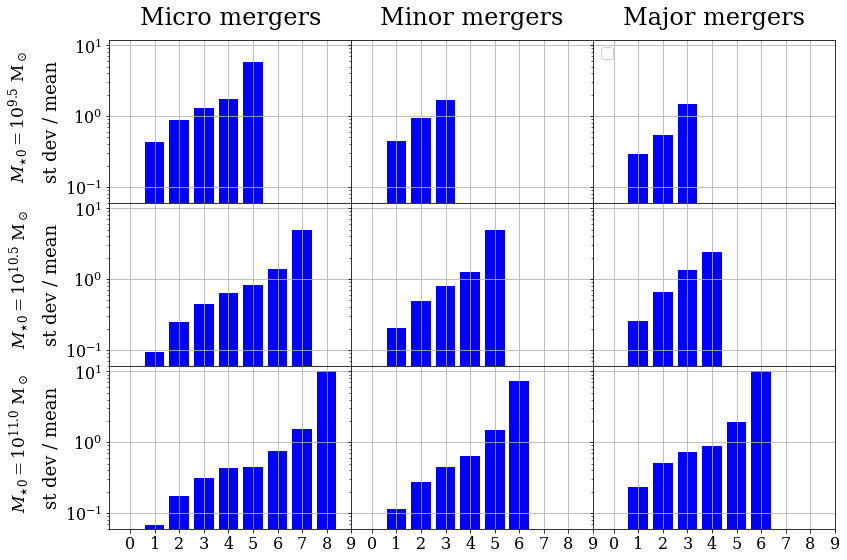

[[7.78831235e-13 4.24869176e-01 8.77385383e-01 1.28436529e+00
  1.75940185e+00 5.83355212e+00            nan            nan
             nan]
 [7.78831235e-13 4.39372300e-01 9.36362758e-01 1.69391289e+00
             nan            nan            nan            nan
             nan]
 [7.78831235e-13 2.92240454e-01 5.46518117e-01 1.48371728e+00
             nan            nan            nan            nan
             nan]
 [7.30726660e-13 9.43252021e-02 2.50460734e-01 4.38764157e-01
  6.39944875e-01 8.39445654e-01 1.38214359e+00 4.96425366e+00
             nan]
 [7.30727550e-13 2.06632906e-01 4.89872498e-01 7.87818271e-01
  1.25453962e+00 4.96400188e+00            nan            nan
             nan]
 [7.33278092e-13 2.58443181e-01 6.59031371e-01 1.32962394e+00
  2.44677985e+00            nan            nan            nan
             nan]
 [6.66276064e-13 6.81333350e-02 1.75577190e-01 3.09282716e-01
  4.28049223e-01 4.46929572e-01 7.54129544e-01 1.55819985e+00
  1.00000000e+01]
 [6.66

In [27]:
allstds=[]
allmeans=[]
Mconds=[9.5,10.5,11.]
rngs=[[-5.,-1.],[-1.,-0.5],[-0.5,0]]

for Mcond in Mconds:
    for rng in rngs:
        key='Ps_{0:0.1f}M_{1:0.1f}-{2:0.1f}'.format(Mcond,rng[0],rng[1])
        with h5py.File(fname,'r') as f:
            dat=(f[key]).value
            Nruns=dat.shape[0]
            means=[np.mean([dat[i][1][c] 
                            for i in range(Nruns)]) for c in range(9)]
            stdevs=[np.std([dat[i][1][c] 
                            for i in range(Nruns)]) for c in range(9)]
        allstds.append(stdevs)
        allmeans.append(means)
allstds=np.array(allstds)
allmeans=np.array(allmeans)
#make stds relative:
allstds/=allmeans
mak_std_panels_rel(fname,ylimp=[6e-2,1.2e1])
print allstds

/home/users/staudt/envs/mergerspython2env/lib/python2.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in divide
/home/users/staudt/envs/mergerspython2env/lib/python2.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log10


[0.06, 12.0]
[0.06, 12.0]
[0.06, 12.0]
[0.06, 12.0]
[0.06, 12.0]
[0.06, 12.0]
[0.06, 12.0]
[0.06, 12.0]
[0.06, 12.0]


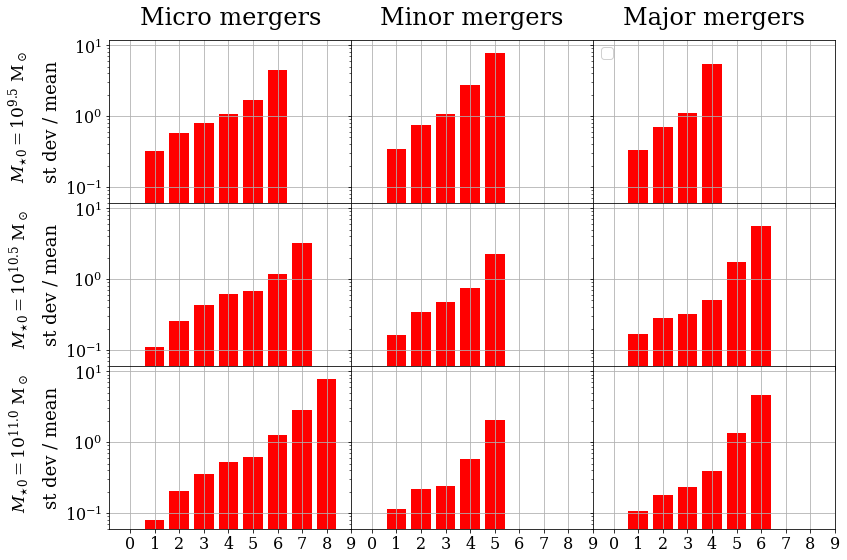

[[8.30552805e-13 3.17032569e-01 5.67276433e-01 7.96771611e-01
  1.05781737e+00 1.68595541e+00 4.46022626e+00            nan
             nan]
 [8.30552805e-13 3.41777857e-01 7.53491384e-01 1.08308589e+00
  2.71333368e+00 7.74596669e+00            nan            nan
             nan]
 [8.30552805e-13 3.29837792e-01 6.95196077e-01 1.09962797e+00
  5.43139669e+00            nan            nan            nan
             nan]
 [7.94136521e-13 1.10149954e-01 2.56432386e-01 4.27331607e-01
  6.18307691e-01 6.81388259e-01 1.19486471e+00 3.27152553e+00
             nan]
 [7.94136521e-13 1.65188503e-01 3.41789093e-01 4.71315125e-01
  7.59252581e-01 2.27118985e+00            nan            nan
             nan]
 [7.94136521e-13 1.67129783e-01 2.85983020e-01 3.21904150e-01
  5.09675337e-01 1.75343172e+00 5.68297364e+00            nan
             nan]
 [6.04957107e-13 8.05718134e-02 2.08049581e-01 3.59369150e-01
  5.20402134e-01 6.27331811e-01 1.25557172e+00 2.88144044e+00
  7.74596669e+00]
 [6.04

In [28]:
allstds=[]
allmeans=[]
Mconds=[9.5,10.5,11.]
rngs=[[-5.,-1.],[-1.,-0.5],[-0.5,0]]

for Mcond in Mconds:
    for rng in rngs:
        key='Ps_{0:0.1f}M_{1:0.1f}-{2:0.1f}'.format(Mcond,rng[0],rng[1])
        with h5py.File(fname4,'r') as f:
            dat=(f[key]).value
            Nruns=dat.shape[0]
            means=[np.mean([dat[i][1][c] 
                            for i in range(Nruns)]) for c in range(9)]
            stdevs=[np.std([dat[i][1][c] 
                            for i in range(Nruns)]) for c in range(9)]
        allstds.append(stdevs)
        allmeans.append(means)
allstds=np.array(allstds)
allmeans=np.array(allmeans)
#make stds relative:
allstds/=allmeans
mak_std_panels_rel(fname,ylimp=[6e-2,1.2e1],col='r')
print allstds

/home/users/staudt/envs/mergerspython2env/lib/python2.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in divide
/home/users/staudt/envs/mergerspython2env/lib/python2.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in divide
/home/users/staudt/envs/mergerspython2env/lib/python2.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10


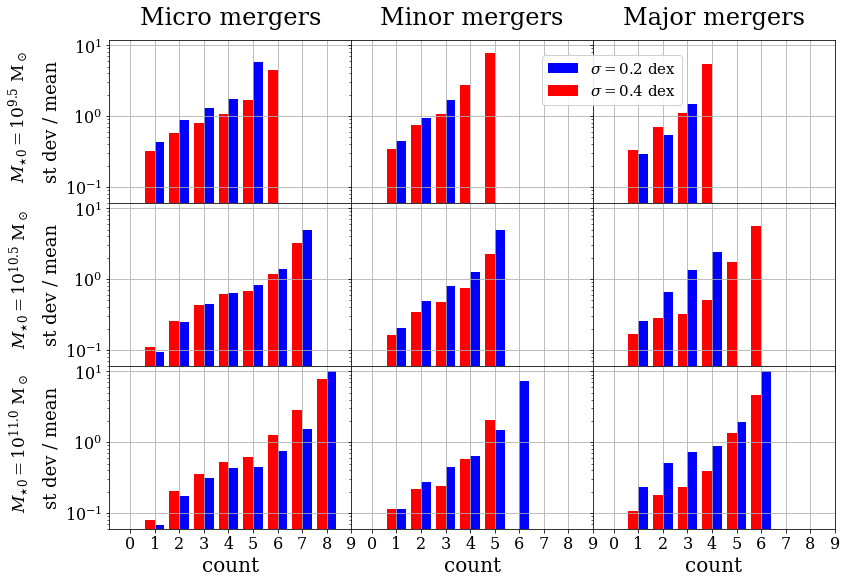

In [29]:
allstds=[]
allmeans=[]
Mconds=[9.5,10.5,11.]
rngs=[[-5.,-1.],[-1.,-0.5],[-0.5,0]]

for Mcond in Mconds:
    for rng in rngs:
        key='Ps_{0:0.1f}M_{1:0.1f}-{2:0.1f}'.format(Mcond,rng[0],rng[1])
        with h5py.File(fname,'r') as f:
            dat=(f[key]).value
            Nruns=dat.shape[0]
            means=[np.mean([dat[i][1][c] 
                            for i in range(Nruns)]) for c in range(9)]
            stdevs=[np.std([dat[i][1][c] 
                            for i in range(Nruns)]) for c in range(9)]
        allstds.append(stdevs)
        allmeans.append(means)
allstds=np.array(allstds)
allmeans=np.array(allmeans)
#make stds relative:
allstds2=allstds/allmeans

allstds=[]
allmeans=[]
Mconds=[9.5,10.5,11.]
rngs=[[-5.,-1.],[-1.,-0.5],[-0.5,0]]

for Mcond in Mconds:
    for rng in rngs:
        key='Ps_{0:0.1f}M_{1:0.1f}-{2:0.1f}'.format(Mcond,rng[0],rng[1])
        with h5py.File(fname4,'r') as f:
            dat=(f[key]).value
            Nruns=dat.shape[0]
            means=[np.mean([dat[i][1][c] 
                            for i in range(Nruns)]) for c in range(9)]
            stdevs=[np.std([dat[i][1][c] 
                            for i in range(Nruns)]) for c in range(9)]
        allstds.append(stdevs)
        allmeans.append(means)
allstds=np.array(allstds)
allmeans=np.array(allmeans)
#make stds relative:
allstds4=allstds/allmeans

mak_std_panels_rel2(allstds2,allstds4,ylimp=[6e-2,1.2e1],
                    xl_loc=0.4)

In [30]:
print allstds2
print ''
print allstds4

[[7.78831235e-13 4.24869176e-01 8.77385383e-01 1.28436529e+00
  1.75940185e+00 5.83355212e+00            nan            nan
             nan]
 [7.78831235e-13 4.39372300e-01 9.36362758e-01 1.69391289e+00
             nan            nan            nan            nan
             nan]
 [7.78831235e-13 2.92240454e-01 5.46518117e-01 1.48371728e+00
             nan            nan            nan            nan
             nan]
 [7.30726660e-13 9.43252021e-02 2.50460734e-01 4.38764157e-01
  6.39944875e-01 8.39445654e-01 1.38214359e+00 4.96425366e+00
             nan]
 [7.30727550e-13 2.06632906e-01 4.89872498e-01 7.87818271e-01
  1.25453962e+00 4.96400188e+00            nan            nan
             nan]
 [7.33278092e-13 2.58443181e-01 6.59031371e-01 1.32962394e+00
  2.44677985e+00            nan            nan            nan
             nan]
 [6.66276064e-13 6.81333350e-02 1.75577190e-01 3.09282716e-01
  4.28049223e-01 4.46929572e-01 7.54129544e-01 1.55819985e+00
  1.00000000e+01]
 [6.66

/home/users/staudt/envs/mergerspython2env/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/home/users/staudt/envs/mergerspython2env/lib/python2.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log10


[0.02, 0.3]
[0.02, 0.3]
[0.02, 0.3]
[0.02, 0.3]
[0.02, 0.3]
[0.02, 0.3]
[0.02, 0.3]
[0.02, 0.3]
[0.02, 0.3]


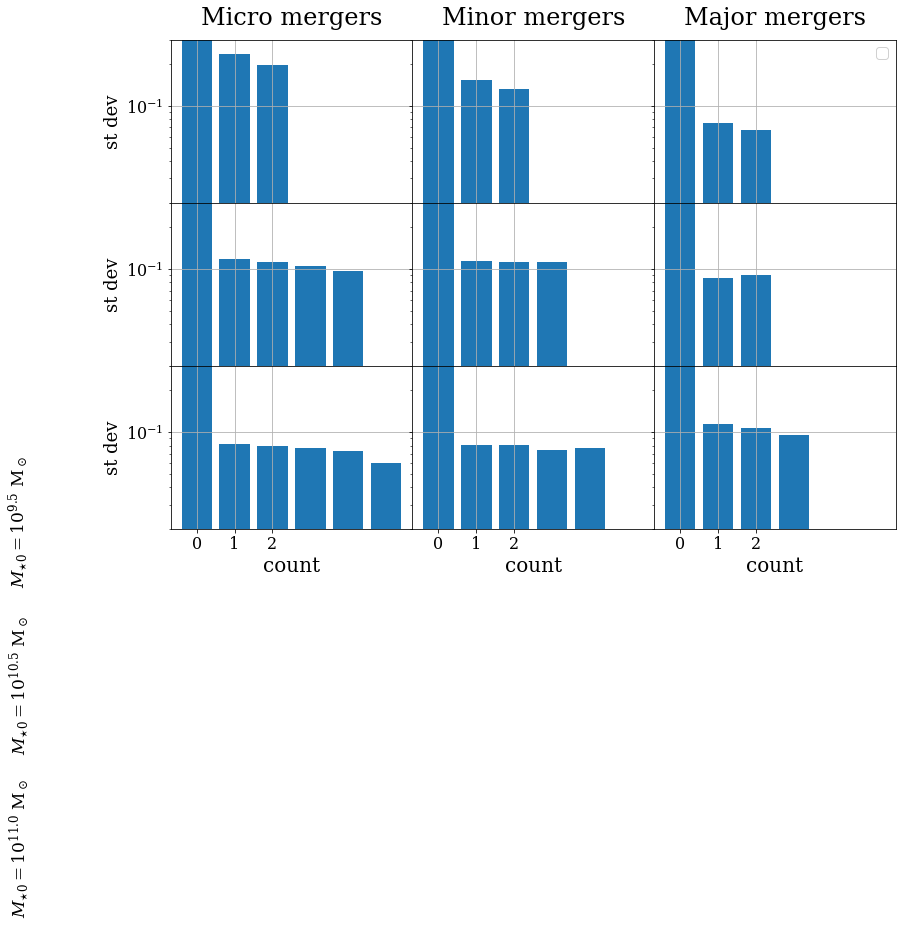

[[9.97364168e+00 2.36168251e-01 1.99028672e-01            nan
             nan            nan            nan            nan
             nan]
 [9.97364168e+00 1.54268488e-01 1.31899809e-01            nan
             nan            nan            nan            nan
             nan]
 [9.97364168e+00 7.48628879e-02 6.76368720e-02            nan
             nan            nan            nan            nan
             nan]
 [4.55970538e+00 1.18006640e-01 1.12624330e-01 1.05631046e-01
  9.62470193e-02            nan            nan            nan
             nan]
 [4.55974190e+00 1.14824534e-01 1.12498990e-01 1.11589695e-01
             nan            nan            nan            nan
             nan]
 [4.46690394e+00 8.66327694e-02 8.98974469e-02            nan
             nan            nan            nan            nan
             nan]
 [6.28895420e+01 8.21745299e-02 7.95240608e-02 7.63795441e-02
  7.30316248e-02 5.94737776e-02            nan            nan
             nan]
 [6.28

In [31]:
allstds=[]
allmeans=[]
Mconds=[9.5,10.5,11.]
rngs=[[-5.,-1.],[-1.,-0.5],[-0.5,0]]

for Mcond in Mconds:
    for rng in rngs:
        key='Ps_{0:0.1f}M_{1:0.1f}-{2:0.1f}'.format(Mcond,rng[0],rng[1])
        with h5py.File(fname,'r') as f:
            dat=np.log10((f[key]).value)
            Nruns=dat.shape[0]
            means=[np.mean([dat[i][1][c] 
                            for i in range(Nruns)]) for c in range(9)]
            stdevs=[np.std([dat[i][1][c] 
                            for i in range(Nruns)]) for c in range(9)]
        allstds.append(stdevs)
        allmeans.append(means)
allstds=np.array(allstds)
allmeans=np.array(allmeans)
#make stds relative:
allstds/=allmeans
allstds=np.abs(allstds)
mak_std_panels(fname,ylimp=[2e-2,3e-1])
print allstds